## 5. Supervised Machine Learning: Regression

## Contains:
### 1. Importing libraries and data
### 2. Data cleaning
### 3. Data prep for regression analysis
### 4. Regression analysis
### Bonus: performance improvement after removing outliersm

## 1. Importing libraries and data 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Define path

path = r'/Users/sophie/Desktop/CareerFoundry /10 2023 missing migrants'
path

'/Users/sophie/Desktop/CareerFoundry /10 2023 missing migrants'

In [4]:
df_mm = pd.read_pickle(os.path.join(path, 'Data', 'prepared data', 'df_mm.pkl'))
df_mm.head()

,main_ID,incident_ID,inc_type,region_inc,website_date_new,month_num,year,tot_dead_miss,tot_migrants,tot_survive,...,country_origin,migration_route,loc_death,info_source,UNSD_geo_group,source_quality,inc_type_num,vict_per_incidents,coordinates,continent
0,2014.MMP00001,2014.MMP00001,Incident,North America,2014-01-06,1,2014,1,1,0,...,Guatemala,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,Northern America,5,1,1-4,"31.650259, -110.366453",North America
1,2014.MMP00002,2014.MMP00002,Incident,North America,2014-01-12,1,2014,1,1,0,...,Unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,Northern America,5,1,1-4,"31.59713, -111.73756",North America
2,2014.MMP00003,2014.MMP00003,Incident,North America,2014-01-14,1,2014,1,1,0,...,Unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,Northern America,5,1,1-4,"31.94026, -113.01125",North America
3,2014.MMP00004,2014.MMP00004,Incident,North America,2014-01-16,1,2014,1,1,0,...,Mexico,US-Mexico border crossing,"near Douglas, Arizona, USA","Ministry of Foreign Affairs Mexico, Pima Count...",Northern America,5,1,1-4,"31.506777, -109.315632",North America
4,2014.MMP00005,2014.MMP00005,Incident,Europe,2014-01-16,1,2014,1,3,2,...,Sudan,Unknown,Border between Russia and Estonia,EUBusiness (Agence France-Presse),Northern Europe,1,1,1-4,"59.1551, 28.0",Europe


In [5]:
df_mm.shape

(13493, 26)

## 2. Data cleaning

In [6]:
# Check inconsistencies
df_mm.describe()

,website_date_new,month_num,year,tot_dead_miss,tot_migrants,tot_survive,identified_demogr,unidentified_demogr,latitude,longitude,source_quality,inc_type_num
count,13493,13493.000000,13493.000000,13493.000000,13493.000000,13493.000000,13493.000000,13493.000000,13493.000000,13493.000000,13493.000000,13493.000000
mean,2019-09-17 14:34:35.209368064,6.684355,2019.197510,4.389461,10.878826,6.489365,1.813829,2.575632,27.144641,-17.913633,3.264063,1.027199
min,2014-01-02 00:00:00,1.000000,2014.000000,1.000000,1.000000,0.000000,0.000000,-87.000000,-37.462916,-144.774250,1.000000,1.000000
25%,2017-10-08 00:00:00,4.000000,2017.000000,1.000000,1.000000,0.000000,1.000000,0.000000,22.056701,-98.454803,2.000000,1.000000
50%,2019-10-05 00:00:00,7.000000,2019.000000,1.000000,1.000000,0.000000,1.000000,0.000000,30.719405,11.140718,4.000000,1.000000
75%,2021-11-30 00:00:00,9.000000,2021.000000,2.000000,3.000000,0.000000,1.000000,1.000000,33.071990,27.311734,4.000000,1.000000
max,2023-10-17 00:00:00,12.000000,2023.000000,1022.000000,1952.000000,1950.000000,250.000000,1022.000000,66.929981,138.086033,5.000000,2.000000
std,NaN,3.340813,2.482202,19.662386,48.698793,41.738181,5.952016,18.163062,11.370606,65.371556,1.371919,0.162670


In [7]:
# Check for missing values

df_mm.isnull().sum()

# No missing values to handle

main_ID                0
incident_ID            0
inc_type               0
region_inc             0
website_date_new       0
month_num              0
year                   0
tot_dead_miss          0
tot_migrants           0
tot_survive            0
identified_demogr      0
unidentified_demogr    0
latitude               0
longitude              0
reg_origin             0
cause_death            0
country_origin         0
migration_route        0
loc_death              0
info_source            0
UNSD_geo_group         0
source_quality         0
inc_type_num           0
vict_per_incidents     0
coordinates            0
continent              0
dtype: int64

In [8]:
# Duplicates check

dups = df_mm.duplicated()
dups.shape # No dups

(13493,)

/var/folders/7f/g3kqhl2s2wd2fd054p87pc_w0000gn/T/ipykernel_94623/2856196323.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_mm['tot_dead_miss'], bins=10) # Shows extreme values


<Axes: xlabel='tot_dead_miss', ylabel='Density'>

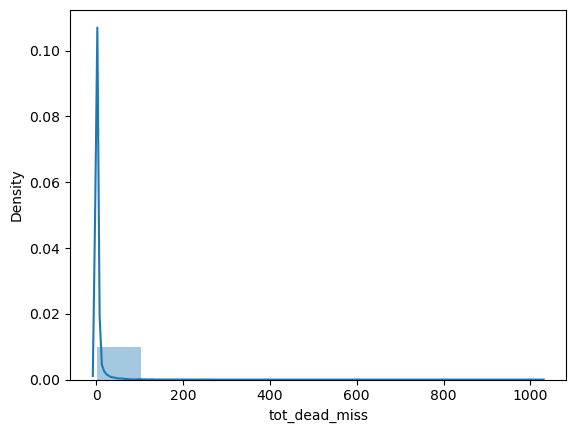

In [9]:
# Extreme values check

sns.distplot(df_mm['tot_dead_miss'], bins=10) # Shows extreme values

<Axes: xlabel='vict_per_incidents'>

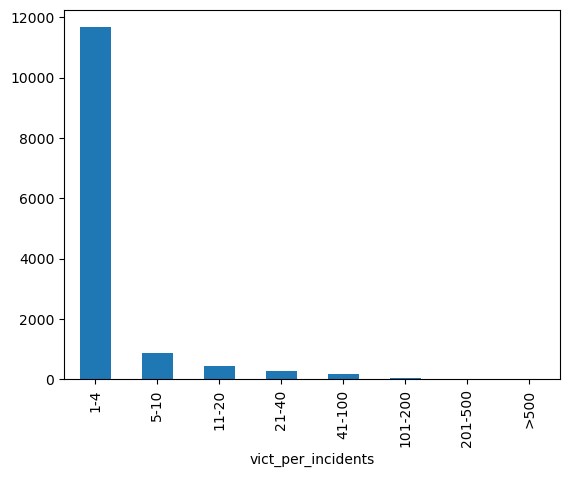

In [10]:
# Extreme values check

# Create a bar chart of vict_per_incident to check outliers

df_mm['vict_per_incidents'].value_counts().plot.bar()

In [11]:
# For the purpose of conducting a regression analyses, exclude incidents with more than 100 victims per incident

# Clean the extreme values from the "tot_dead_miss" variable observed during the consistency checks.

df_cl = df_mm[df_mm['tot_dead_miss'] <=100] 

In [12]:
df_cl.shape

(13436, 26)

/var/folders/7f/g3kqhl2s2wd2fd054p87pc_w0000gn/T/ipykernel_94623/2660834277.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_mm['source_quality'], bins=10) # Shows extreme values


<Axes: xlabel='source_quality', ylabel='Density'>

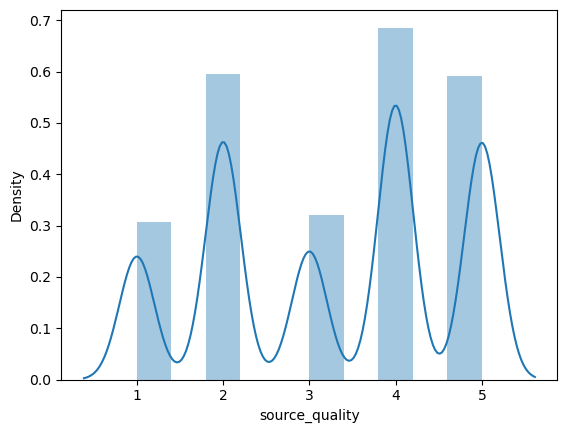

In [13]:
# Extreme values check

sns.distplot(df_mm['source_quality'], bins=10) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

In [14]:
df_cl['tot_dead_miss'].mean() # Check the mean

3.4883149746948496

In [15]:
df_cl['tot_dead_miss'].median() # Check the median

1.0

In [16]:
df_cl['tot_dead_miss'].max() # Check the max

100

In [17]:
df_cl['unidentified_demogr'].mean() # Check the mean

1.7820779994045848

In [18]:
df_cl['unidentified_demogr'].median() # Check the median

0.0

In [19]:
df_cl['unidentified_demogr'].min() # Check the min

-87

In [20]:
# Filter rows where 'unidentified_demogr' is negative
negative_demogr_rows = df_mm[df_mm['unidentified_demogr'] < 0]

selected_columns = negative_demogr_rows[['main_ID', 'tot_dead_miss', 'identified_demogr', 'unidentified_demogr']]

# Print the selected columns
print(selected_columns)

             main_ID  tot_dead_miss  identified_demogr  unidentified_demogr
14     2014.MMP00015              1                  2                   -1
15     2014.MMP00016              1                  2                   -1
35     2014.MMP00036              1                  2                   -1
75     2014.MMP00077              1                  2                   -1
88     2014.MMP00090              1                  2                   -1
...              ...            ...                ...                  ...
13116   2023.MMP0670              2                 11                   -9
13242   2023.MMP0798              6                  7                   -1
13262   2023.MMP0818              1                  2                   -1
13263   2023.MMP0819              1                  2                   -1
13331   2023.MMP0887              4                  7                   -3

[926 rows x 4 columns]


#### Inconsistency! In 926 cases, the number of females and or males and or children is > the total number of deaths and missings. These cases could be excluded because we have no explanation here about which number is more correct (identified demographics or deaths and missings total). 

In [21]:
# Create a new DataFrame excluding rows with negative 'unidentified_demogr'
new_df = df_cl[df_cl['unidentified_demogr'] >= 0]

In [22]:
new_df.shape

(12511, 26)

## 3. Data prep for regression analysis 

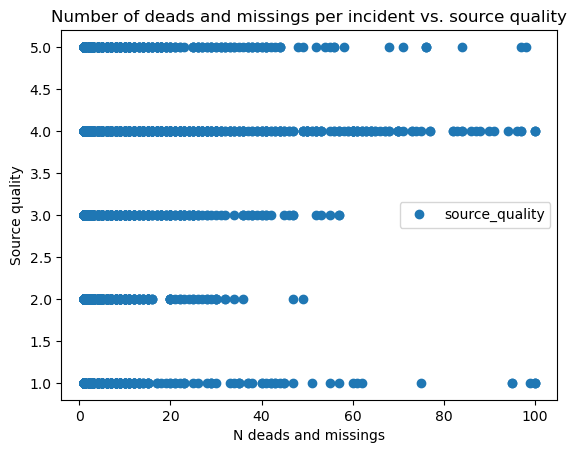

In [23]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

new_df.plot(x = 'tot_dead_miss', y='source_quality',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Number of deads and missings per incident vs. source quality')  
plt.xlabel('N deads and missings')  
plt.ylabel('Source quality')  
plt.show()

#### My initial hypothesis: If numbers of deaths and missings increase, then the source quality is better.
This is not suited for a linear regression, because my outcome variable is categorical.

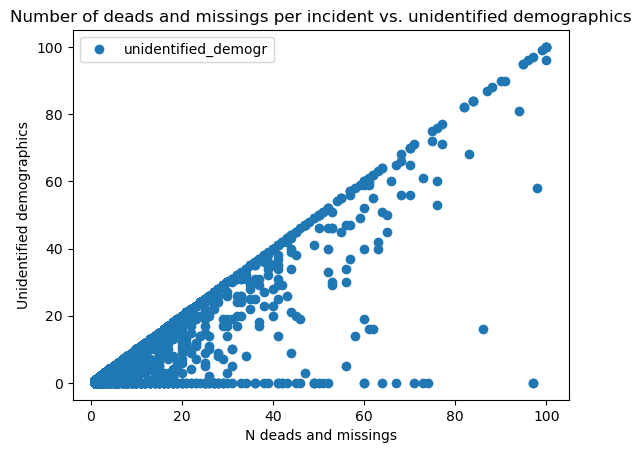

In [24]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

new_df.plot(x = 'tot_dead_miss', y='unidentified_demogr',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Number of deads and missings per incident vs. unidentified demographics')  
plt.xlabel('N deads and missings')  
plt.ylabel('Unidentified demographics')  
plt.show()

#### Hypothesis: The higher the number of deaths and missings per incident, the less victims are identified in terms of demographics (female, male, children) or: the more victims are unidentified.

In [25]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = new_df['tot_dead_miss'].values.reshape(-1,1)
y = new_df['unidentified_demogr'].values.reshape(-1,1)

In [26]:
X

array([[1],
       [1],
       [1],
       ...,
       [2],
       [1],
       [1]])

In [27]:
y

array([[0],
       [1],
       [1],
       ...,
       [0],
       [1],
       [0]])

In [28]:
# Split data into a training set and a test set (0.3 --> 30% of the data in training set, 70% in test set).

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 4. Regression Analysis 

In [29]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [30]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

##### 1. Check how the regression fits the training set

In [31]:
# Predicting the values of y using X.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [32]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

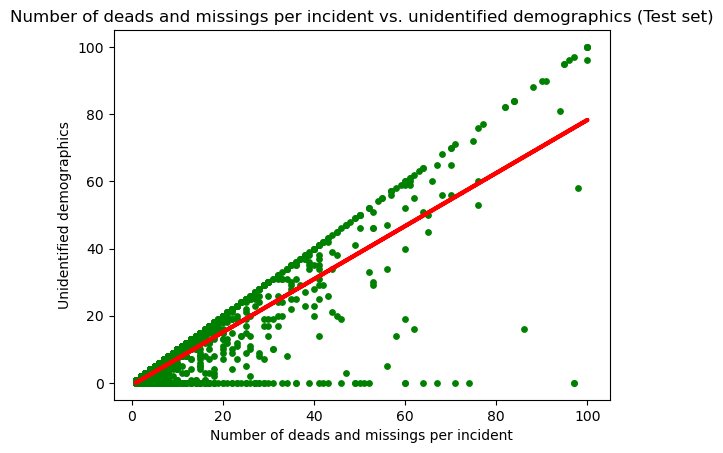

In [33]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Number of deads and missings per incident vs. unidentified demographics (Test set)')
plot_test.xlabel('Number of deads and missings per incident')
plot_test.ylabel('Unidentified demographics')
plot_test.show()

#### Visually interpreted, the regression line appears to fit the data well. However, some values at the lower end of the distribution might deteriorate the model fit.

In [34]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.78928122]]
Mean squared error:  11.737311054080097
R2 score:  0.8109277857445085


##### 2. Compare how the regression fits the test set

In [35]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

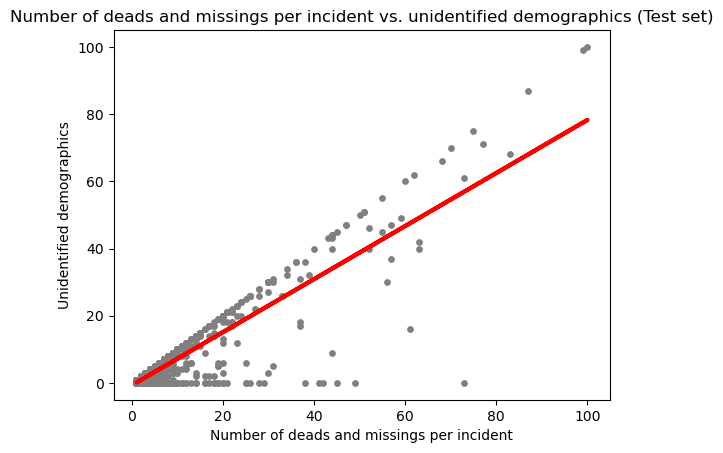

In [36]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Number of deads and missings per incident vs. unidentified demographics (Test set)')
plot_test.xlabel('Number of deads and missings per incident')
plot_test.ylabel('Unidentified demographics')
plot_test.show()

#### Visually interpreted, the regression line appears to fit the data well. However, some values at the lower end of the distribution might deteriorate the model fit.

In [37]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [38]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.78928122]]
Mean squared error:  7.607369279747813
R2 score:  0.8182358974659187


#### Slope is positive: as the number of victims per incident rises, the number of unidentified victims rises, too.  

#### Modelfit seems okay: MSE is rather small ( regression line passes fairly close to the observations), R2 is .81, indicating a moderate to good fit. 

In [39]:
y_predicted

array([[10.36630235],
       [ 0.89492766],
       [ 0.10564644],
       ...,
       [ 0.10564644],
       [ 0.10564644],
       [ 4.05205255]])

In [40]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,2,10.366302
1,1,0.894928
2,1,0.105646
3,0,0.105646
4,0,0.105646
5,0,0.105646
6,0,0.105646
7,0,1.684209
8,0,0.105646
9,0,0.105646


#### Apart from the first pair, the values seem close to each other.

#### No indication of overfitting. R2 train and R2 test is very comparable.

#### I would argue that the model performed well on the test set. However, I had to exclude inconsistent data with the number of overall identified victims was greater than the number of the total of victims. I checked some incidents in Excel, but there is no clear indication which values are true and no hints in the data documentation. This might have led to sample bias, because the excluded cases might be particulalrlythose well identified, or also unidentified, shaping the algorithm to being even more or less adequat. 